<a href="https://colab.research.google.com/github/TatyanaPythonista/handwritten__digit_recognition_by_tensorflow/blob/main/handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist  # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

Загрузка обучающей и тестовой выборки

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Нормализация входных данных

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

Преобразование выходных значений в векторы по категориям

In [ ]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Отображение первых 25 изображений из обучающей выборки

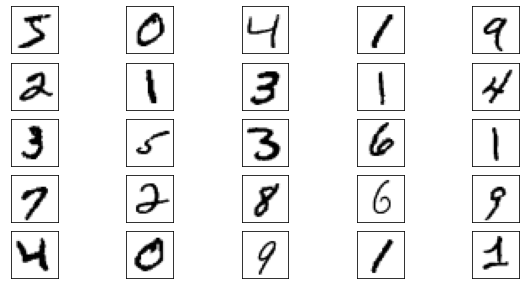

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()


Формирование модели нейронной сети и вывод ее структуры в консоль

In [ ]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),  # преобразую матрицу изображения 28*28 в вектор 784
    Dense(128, activation='relu'),  # создаю скрытый слой из 128 полносвязных нейронов с ф-цией акт relu
    Dense(10, activation='softmax')  # создаю скрытый слой из 10 полносвязных нейронов с ф-цией акт softmax
])

print(model.summary())  # вывод структуры НС в консоль


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


Создаю свой оптимозатор

Компиляция НС с оптимизацией по Adam и критерием - категориальная кросс-энтропия

In [ ]:
myOpt = keras.optimizers.SGD(learning_rate=0.001, nesterov = True)
model.compile(optimizer=myOpt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Запуск процесса обучения: 80% - обучающая выборка, 20% - выборка валидации

In [ ]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2854 - accuracy: 0.9187 - val_loss: 0.1475 - val_accuracy: 0.9589
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1267 - accuracy: 0.9628 - val_loss: 0.1132 - val_accuracy: 0.9678
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0875 - accuracy: 0.9744 - val_loss: 0.0971 - val_accuracy: 0.9707
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0640 - accuracy: 0.9809 - val_loss: 0.0879 - val_accuracy: 0.9741
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0503 - accuracy: 0.9847 - val_loss: 0.0874 - val_accuracy: 0.9734


Запуск с тестовой выборкой


In [ ]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0795 - accuracy: 0.9746


[0.07945685088634491, 0.9746000170707703]

Проверка распознования цифр


[[2.8864696e-08 3.7268538e-10 9.6384406e-07 3.8404203e-11 7.7400282e-06
  1.2837834e-08 9.9999106e-01 1.0040373e-07 8.7827779e-08 3.5981098e-09]]
Распознанная цифра: 6


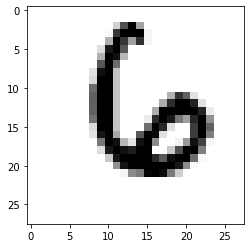

In [ ]:
n = 88
x = np.expand_dims(x_test[n], axis=0)
result = model.predict(x)
print(result)
print(f'Распознанная цифра: {np.argmax(result)}')

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

Распознование всей тестовой выборки


In [ ]:
prediction = model.predict(x_test)
prediction = np.argmax(prediction, axis=1)

print(prediction.shape)

print(prediction[:20])
print(y_test[:20])

(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Выделение неверных результатов


In [ ]:
mask = prediction == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = prediction[~mask]

print(x_false.shape)

[ True  True  True  True  True  True  True  True False  True]
(254, 28, 28)


Вывод первых 5 неверных результатов


Значение сети: 6


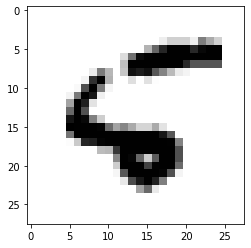

Значение сети: 2


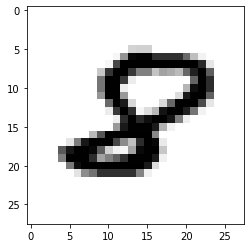

Значение сети: 2


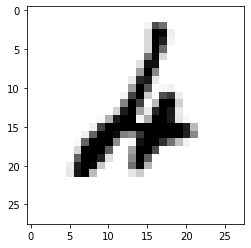

Значение сети: 3


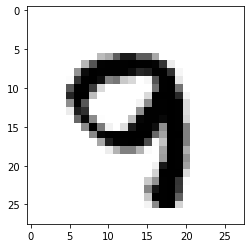

Значение сети: 8


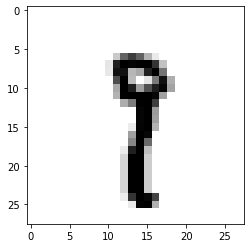

In [ ]:
for i in range(5):
    print("Значение сети: "+str(y_false[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()